# SPOT Kriging in 10 Dimensions:  Exact (Michalewicz Function)

This notebook demonstrates how to use the `Spot` class from `spotpython` with and without the Nyström approximation for Kriging surrogates on the 10-dimensional Michalewicz function.

We use a maximum of 300 function evaluations.

Start tensorboard with:

```bash
tensorboard --logdir="runs/"
```

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import Spot
from spotpython.utils.init import fun_control_init, design_control_init, surrogate_control_init

Seed set to 123


## Define the 10D Michalewicz Function

In [2]:
# do not change, these are given by the organizers
dim = 10
lower = np.full(dim, 0)
upper = np.full(dim, np.pi)
fun = Analytical().fun_michalewicz
fun_evals = 300
max_time =  60

## Set up SPOT Controls

In [3]:
init_size = dim
use_nystrom = False
seed = 321
max_surrogate_points = fun_evals
max_time = 60

# Compile the necessary imports

In [4]:
fun_control = fun_control_init(
    lower=lower,
    upper=upper,
    fun_evals=fun_evals,
    seed=seed,
    show_progress=True,
    TENSORBOARD_CLEAN=True,
    tensorboard_log=True,
    max_time=max_time
)
design_control = design_control_init(init_size=init_size)
surrogate_control_exact = surrogate_control_init(use_nystrom=use_nystrom, max_surrogate_points=max_surrogate_points)

Seed set to 321


Moving TENSORBOARD_PATH: runs/ to TENSORBOARD_PATH_OLD: runs_OLD/runs_2025_11_05_09_08_51_0
Created spot_tensorboard_path: runs/spot_logs/000_p040025_2025-11-05_09-08-51 for SummaryWriter()


# Sklearn Gaussian Process Regressor as Surrogate

In [5]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel

# Used a Matern kernel instead of the standard spotpython RBF kernel
kernel = ConstantKernel(1.0, (1e-2, 1e12)) * Matern(length_scale=1.0, length_scale_bounds=(1e-4, 1e2), nu=2.5)
S_GP = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=100)
spot_exact_sk = Spot(
    fun=fun,
    fun_control=fun_control,
    design_control=design_control,
    surrogate_control=surrogate_control_exact,
    surrogate=S_GP,
)
spot_exact_sk.run()

spotpython tuning: -1.909128962635467 [----------] 3.67%. Success rate: 0.00% 
spotpython tuning: -2.779427569120735 [----------] 4.00%. Success rate: 50.00% 
spotpython tuning: -2.779427569120735 [----------] 4.33%. Success rate: 33.33% 
spotpython tuning: -2.779427569120735 [----------] 4.67%. Success rate: 25.00% 
spotpython tuning: -3.2119020715657354 [----------] 5.00%. Success rate: 40.00% 
spotpython tuning: -3.2119020715657354 [#---------] 5.33%. Success rate: 33.33% 
spotpython tuning: -3.2119020715657354 [#---------] 5.67%. Success rate: 28.57% 
spotpython tuning: -3.3391515283456545 [#---------] 6.00%. Success rate: 37.50% 
spotpython tuning: -3.3391515283456545 [#---------] 6.33%. Success rate: 33.33% 
spotpython tuning: -3.411784183887579 [#---------] 6.67%. Success rate: 40.00% 
spotpython tuning: -3.4470012631092235 [#---------] 7.00%. Success rate: 45.45% 
spotpython tuning: -3.452659777394402 [#---------] 7.33%. Success rate: 50.00% 
spotpython tuning: -3.5241383868272

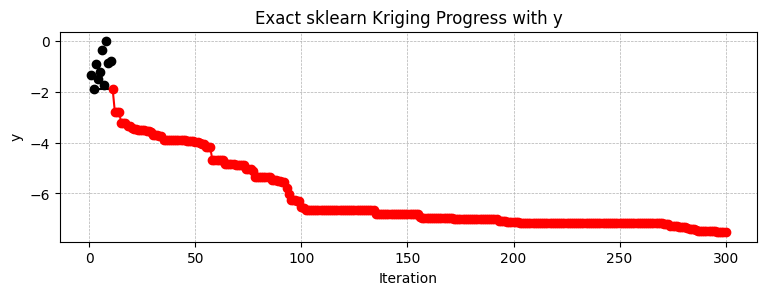

In [6]:
spot_exact_sk.plot_progress(log_y=False, title="Exact sklearn Kriging Progress with y")

In [7]:
print(f"[6D] Exact Kriging y: min y = {spot_exact_sk.min_y:.4f} at x = {spot_exact_sk.min_X}")


[6D] Exact Kriging y: min y = -7.5257 at x = [2.10228431 2.70249094 2.21713328 2.485069   2.62812863 2.02849383
 2.22044232 1.35809939 1.28131032 1.21812455]


# Evaluation of 30 repeats with Kriging and Matern kernel

In [8]:
import json
import numpy as np

# Load results from spot_michalewicz.json
with open("spot_michalewicz.json", "r") as f:
    data = json.load(f)

# Extract all "evaluations" values
evals = [
    iteration["sampled_locations"][0]["evaluations"]
    for iteration in data["search_iterations"]
]

# Compute mean and standard deviation
mean_eval = np.mean(evals)
std_eval = np.std(evals)

print(f"Mean of evaluations: {mean_eval:.6f}")
print(f"Standard deviation of evaluations: {std_eval:.6f}")


Mean of evaluations: -5.390014
Standard deviation of evaluations: 1.048200
